In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy
np = numpy
import os

In [2]:
def moving_avg(x, N=500):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

def get_bleu(dirFile):
    with open(dirFile, 'r') as f:
        data = f.readlines()
    return float(data[-1])*100.0

def get_bleu_detok_avg(dirFile):
    with open(dirFile, 'r') as f:
        data = f.readlines()
#     print(dirFile, data)
    b = data[0].split(',')[0].split(' ')[-1]
    return float(b)

def get_ep_lst_bleu_lst(dirSet, f_bleu='bleu.log', flag_detok_avg=False):
    dirFile_lst = [os.path.join(dirSet, '{d}/{f}'.format(d=d, f=f_bleu)) for d in os.listdir(dirSet)]
    ep_lst = [float(x.split('_')[-1].split('/')[0]) for x in dirFile_lst]
    tmp = sorted(zip(ep_lst, dirFile_lst))
    ep_lst, dirFile_lst = [ list(tpl) for tpl in zip(*tmp)]
    if flag_detok_avg:
        return ep_lst, [get_bleu_detok_avg(d) for d in dirFile_lst]
    else:
        return ep_lst, [get_bleu(d) for d in dirFile_lst]

def plot_bleu_lst(ep_lst, bleu_lst, y_lab='4-gram BLEU'):
    plt.plot(ep_lst, bleu_lst)
    m = max(bleu_lst)
    i = ep_lst[bleu_lst.index(m)]
    plt.plot(i, m, 'x', label='max = {} at ep {}'.format(m,i))
    plt.xlabel('epoch'); plt.ylabel(y_lab)
    plt.legend()
    plt.show()

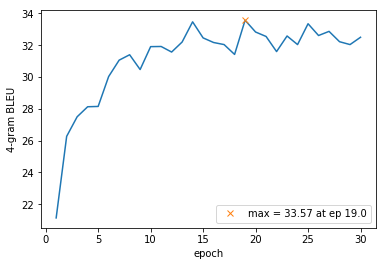

In [26]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

In [39]:
# reading data generate plot
def get_xNy(dirFile,print_every=200):
    with open(dirFile,'r') as f:
        data = f.readlines()
    data = [d.strip('\n').split(' ')[-1] for d in data if 'fr_percent' in d]
    data = [float(d) for d in data]
    x_lst = [x*print_every for x in range(1,1+len(data))]
    return x_lst, data

In [42]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr15/log.txt'
x_lst_fr15, data_fr15 = get_xNy(dirFile)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-log/log.txt'
x_lst, data = get_xNy(dirFile)

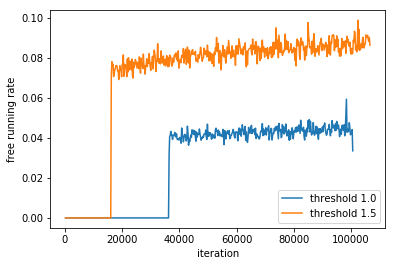

In [45]:
plt.plot(x_lst, data, label='threshold 1.0')
plt.plot(x_lst_fr15, data_fr15, label='threshold 1.5')
plt.xlabel('iteration'); plt.ylabel('free running rate')
plt.legend()
plt.show()

check BLEU

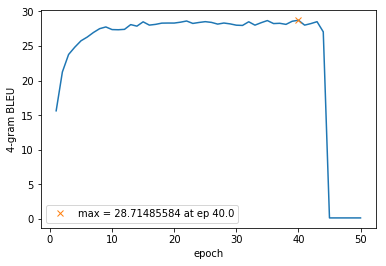

In [11]:
# asup
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log'))

tst2013


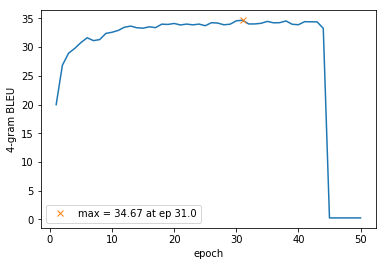

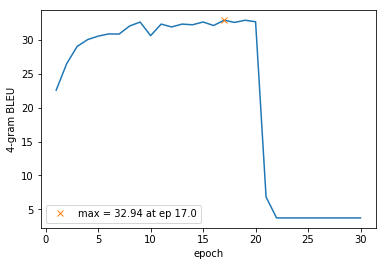

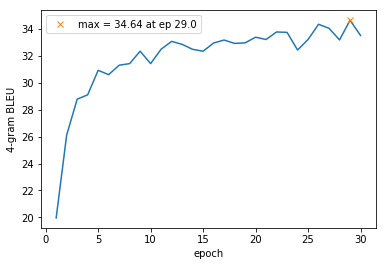

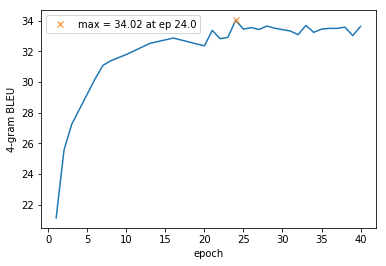

tst2014


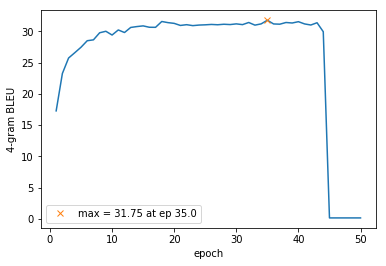

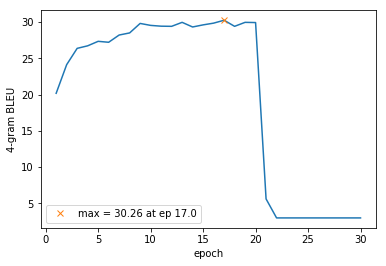

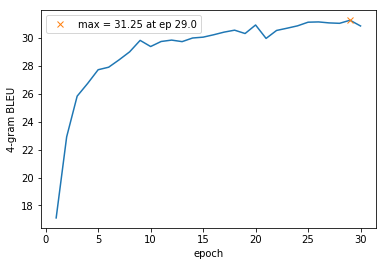

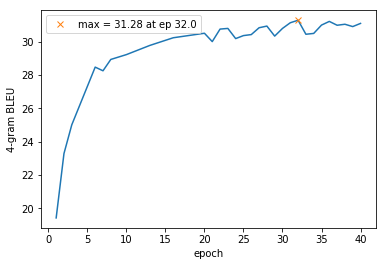

In [29]:
for tst in ['tst2013', 'tst2014']:
    print(tst)
    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-v2/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf-bs128/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

tst2013


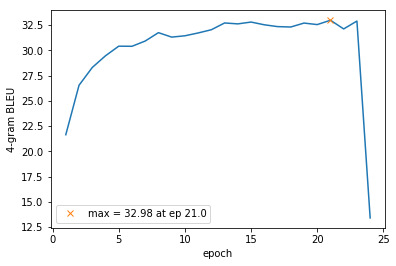

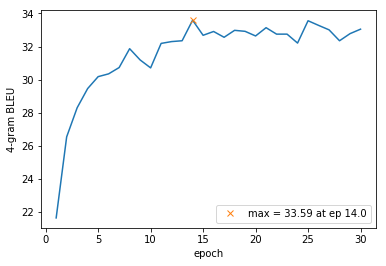

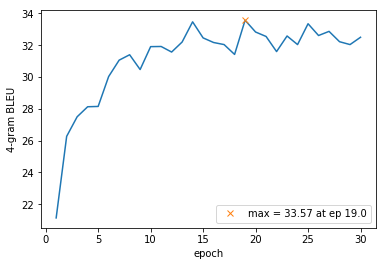

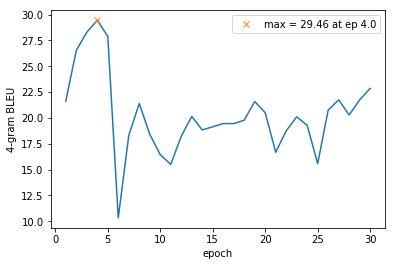

tst2014


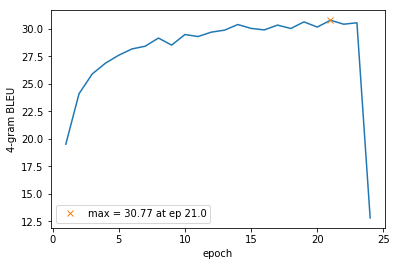

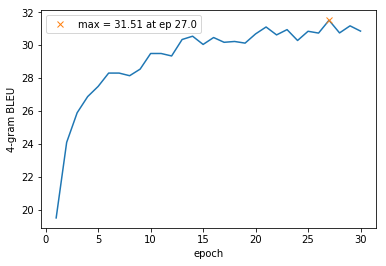

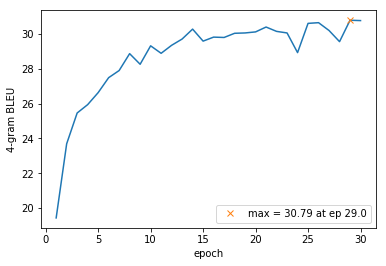

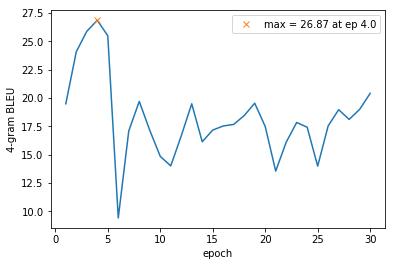

In [30]:
for tst in ['tst2013', 'tst2014']:
    print(tst)
    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr0.0/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

    dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.25/{}/'.format(tst)
    plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet, f_bleu='bleu-DETOK.log', flag_detok_avg=True))

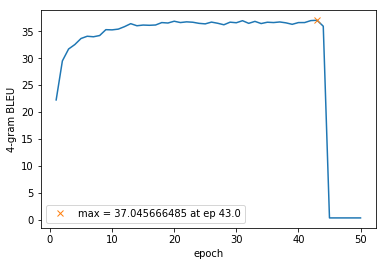

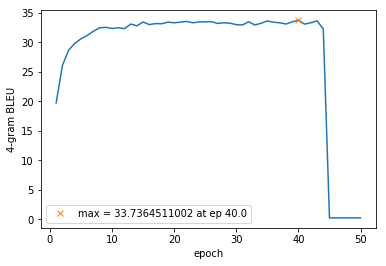

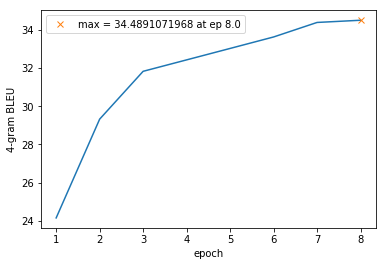

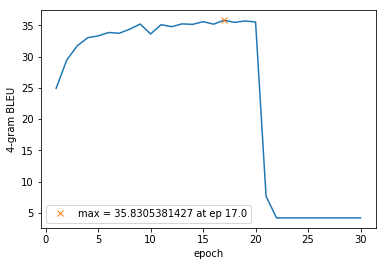

In [3]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0002-tf-bs50-v2/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

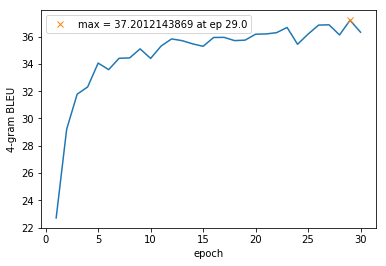

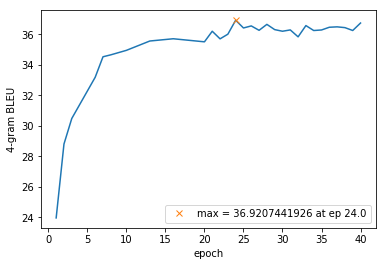

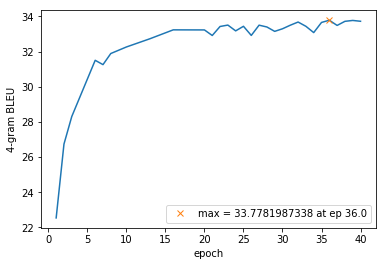

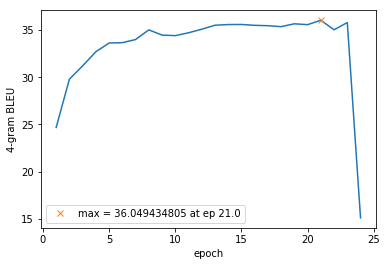

In [6]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf-bs128/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0013-aftf/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr0.0/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

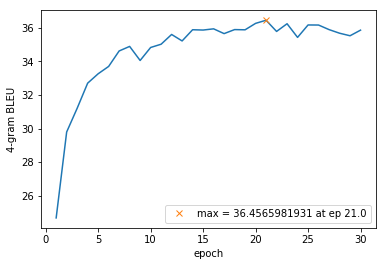

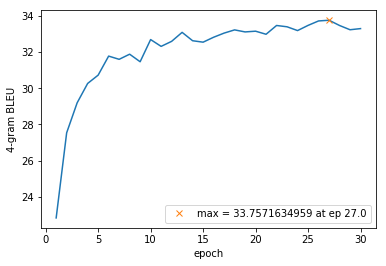

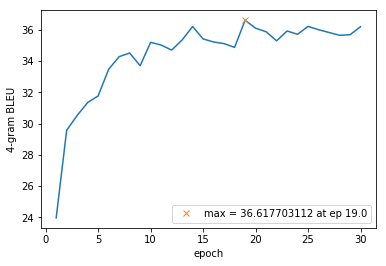

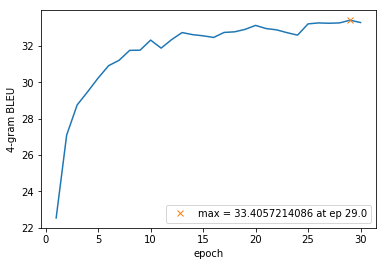

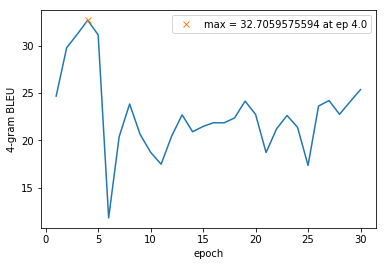

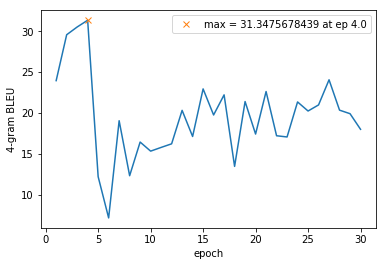

In [7]:
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.5/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.5/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))
dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/tst2014/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.25/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

dirSet = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.75/tst2013/'
plot_bleu_lst(*get_ep_lst_bleu_lst(dirSet))

check loss

In [45]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_2 = pickle.load(f)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr4.0/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_4 = pickle.load(f)

dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr8.0/dct_info.pkl'
with open(dirFile,'rb') as f:
    dct_info_8 = pickle.load(f)

for dct in [dct_info_2, dct_info_4, dct_info_8]:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)

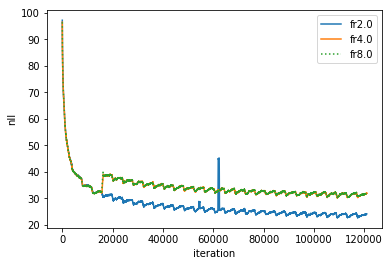

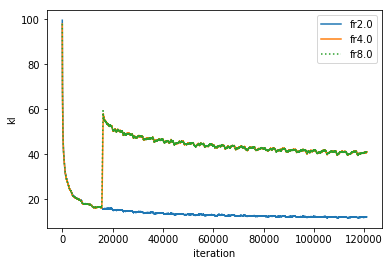

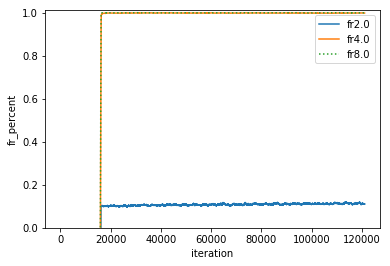

In [48]:
for k in ['nll', 'kl', 'fr_percent']:
    plt.plot(dct_info_2[k], label='fr2.0')
    plt.plot(dct_info_4[k], label='fr4.0')
    plt.plot(dct_info_8[k], ':', label='fr8.0')
    if k=='fr_percent': plt.ylim([0,1.01])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

In [9]:
fr_lst = [2.0, 2.5, 3.0, 3.25]
dirFile_lst = ['/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.5/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/dct_info.pkl', 
               '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.25/dct_info.pkl'
              ]
dct_lst = []
for dirFile in dirFile_lst:
    with open(dirFile,'rb') as f:
        dct_lst.append(pickle.load(f))

for dct in dct_lst:
    for k in dct.keys():
        dct[k] = moving_avg(dct[k], N=500)

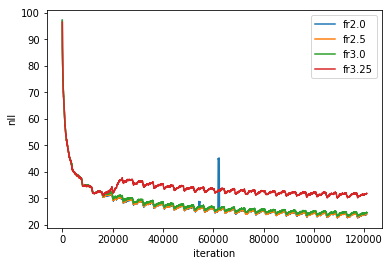

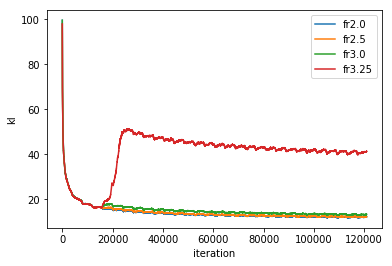

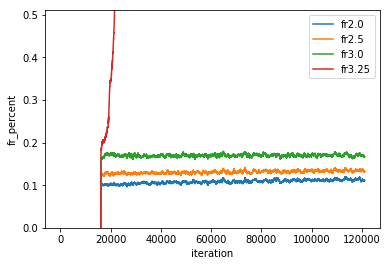

In [10]:
for k in ['nll', 'kl', 'fr_percent']:
    for fr, dct in zip(fr_lst, dct_lst):
        plt.plot(dct[k], label='fr{}'.format(fr))
    if k=='fr_percent': plt.ylim([0,0.51])
    plt.xlabel('iteration'); plt.ylabel(k)
    plt.legend()
    plt.show()

check data

In [49]:
dirFile = '/home/dawna/tts/qd212/models/af/af-lib/iwslt15-enfr/iwslt15_en_fr/train.tags.en-fr.en'
with open(dirFile, 'r') as f:
    seq_src_train = f.readlines()
    
dirFile = '/home/dawna/tts/qd212/models/af/af-lib/iwslt15-enfr/iwslt15_en_fr/train.tags.en-fr.fr'
with open(dirFile, 'r') as f:
    seq_tgt_train = f.readlines()
    
seq_src_tgt_train = [s+t for s,t in zip(seq_src_train, seq_tgt_train)]
print(len(seq_src_train), len(seq_tgt_train), len(seq_src_tgt_train))

(207577, 207577, 207577)


In [36]:
dct_pair_cnt = {i:seq_src_tgt_train.count(i) for i in seq_src_tgt_train}

In [37]:
tmp_pair = dct_pair_cnt.items()
tmp_pair.sort(key = lambda x: x[1])
lst_seq_pair, lst_cnt_pair = map(list, zip(*tmp_pair))

In [39]:
print(len(tmp_pair), tmp_pair[-4:])
for limit in [1, 10, 100]:
    lst_cnt_rep = [l for l in lst_cnt_pair if l>limit]
    print(limit, len(lst_cnt_rep))

(205448, [('Thank you .\nMerci\n', 40), ('\n\n', 218), ('Thank you very much .\nMerci beaucoup .\n', 328), ('Thank you .\nMerci .\n', 788)])
(1, 356)
(10, 13)
(100, 3)


In [63]:
my_dict = {i:seq_src_train.count(i) for i in seq_src_train}

In [64]:
tmp = my_dict.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))

(1, 629)
(10, 17)
(100, 3)
629


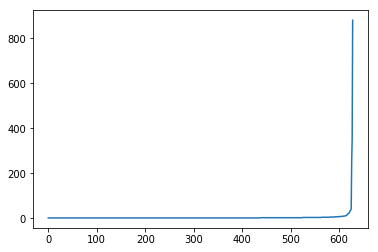

609


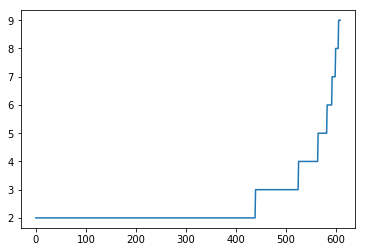

In [85]:
# print(len([l for l in lst_cnt if l>1]))
# print(len([l for l in lst_cnt if l>1]))

for limit in [1, 10, 100]:
    lst_cnt_rep = [l for l in lst_cnt if l>limit]
    print(limit, len(lst_cnt_rep))


lst_cnt_rep = [l for l in lst_cnt if l>1]
print(len(lst_cnt_rep))
plt.plot(lst_cnt_rep)
# plt.ylim(0,30)
plt.show()

lst_cnt_rep = [l for l in lst_cnt if l>1 and l<10]
print(len(lst_cnt_rep))
plt.plot(lst_cnt_rep)
# plt.ylim(0,30)
plt.show()

check AAF

In [38]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr2.0-log/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
print(len(dct_fr_seqs))

tmp = dct_fr_seqs.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))
lst_l = [len(s) for s in lst_seq]

64635


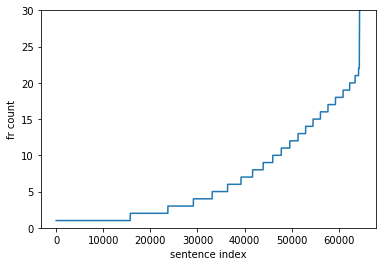

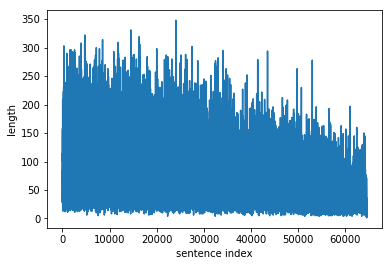

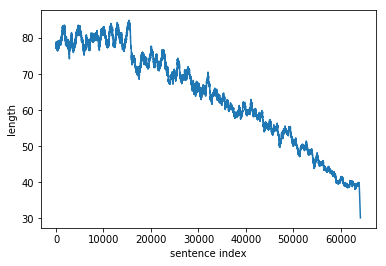

fr cnt: 1
[('Voice : And who are these ? MT : Ah , mischief @-@ makers . Watch .', 1), ('One &apos;s a boiling chamber , and one &apos;s the water holder .', 1), ('Barack Obama won - - because he mobilized people as never before through the use of social networks .', 1), ('And you see that Z.Q. there was 80 @-@ odd .', 1), ('I &apos;m so lucky that there &apos;s this archive of performances that I can share with my students .', 1), ('In the simplicity realm , it &apos;s also interesting .', 1), ('Gone very fast , disappeared .', 1), ('So we humored him , we kept him happy . &quot;', 1), ('She went to vocational school for accounting .', 1), ('If you put a five year @-@ old child &apos;s dexterity against the best robots of today , the answer is simple : the child wins easily .', 1)]
fr cnt: 4
[('And it cost Nokia absolutely nothing .', 4), ('&quot; We have lasers ; we can <unk> it out . &quot;', 4), ('The miracle of your mind isn &apos;t that you can see the world as it is .', 4), ('Ov

In [49]:
plt.plot(lst_cnt)
plt.ylim(0,30)
plt.xlabel('sentence index'); plt.ylabel('fr count')
plt.show()

plt.plot(lst_l)
plt.xlabel('sentence index'); plt.ylabel('length')
plt.show()

plt.plot(moving_avg(lst_l))
plt.xlabel('sentence index'); plt.ylabel('length')
# plt.xlim(0,30)
plt.show()

for start in [0, 30000, 50000, 60000]:
    print('fr cnt: {}'.format(lst_cnt[start]))
    print(tmp[start:start+10])

# print(tmp[:10])
# plt.plot(lst_cnt[:500])
# plt.ylim(0,30)
# plt.show()

# print(tmp[-10:])
# plt.plot(lst_cnt[-500:])
# plt.ylim(0,100)
# plt.show()

In [3]:
dirFile = '/home/dawna/tts/qd212/models/af/results/models-v9enfr/aaf-v0020-sched-fr3.0/dct_fr_seqs.pkl'
with open(dirFile,'rb') as f:
    dct_fr_seqs = pickle.load(f)
print(len(dct_fr_seqs))

tmp = dct_fr_seqs.items()
tmp.sort(key = lambda x: x[1])
lst_seq, lst_cnt = map(list, zip(*tmp))
lst_l = [len(s) for s in lst_seq]

108790


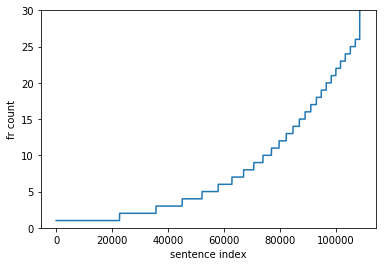

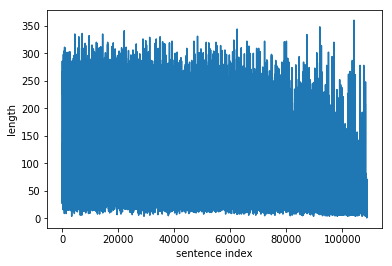

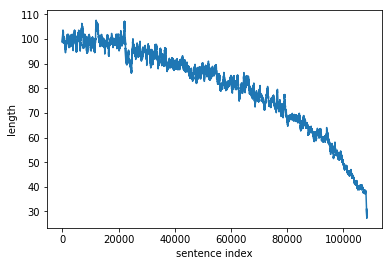

In [4]:
plt.plot(lst_cnt)
plt.ylim(0,30)
plt.xlabel('sentence index'); plt.ylabel('fr count')
plt.show()

plt.plot(lst_l)
plt.xlabel('sentence index'); plt.ylabel('length')
plt.show()

plt.plot(moving_avg(lst_l))
plt.xlabel('sentence index'); plt.ylabel('length')
# plt.xlim(0,30)
plt.show()